# NAME : S.CHARAN RAJU

# REG-NO : 19BAI1149

In [31]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,callbacks
import matplotlib.pyplot as plt

# A1 : CNN with two Conv layers

In [3]:
train_datagen_with_transforms = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True)
train_datagen_with_no_transforms = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255)

In [37]:
train_generator = train_datagen_with_no_transforms.flow_from_directory(
    'C:\\Users\\Charan\\Desktop\\cifar10',
    target_size=(32, 32),
    batch_size=32,
    class_mode="sparse"
)
train_generator_with_data_augmentation = train_datagen_with_transforms.flow_from_directory(
    'C:\\Users\\Charan\\Desktop\\cifar10',
    target_size=(32, 32),
    batch_size=32,
    class_mode="sparse"
)
validation_generator = val_datagen.flow_from_directory(
    'C:\\Users\\Charan\\Desktop\\cifar10',
    target_size=(32, 32),
    batch_size=32,
    class_mode="sparse"
)

Found 60000 images belonging to 1 classes.
Found 60000 images belonging to 1 classes.
Found 60000 images belonging to 1 classes.


In [8]:
sample_data = next(validation_generator)
sample_data[0].shape

(32, 32, 32, 3)

In [9]:
nb_train_samples = train_generator.samples
nb_val_samples = validation_generator.samples

In [10]:
model =models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10))

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)

In [10]:
model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [11]:
history = model.fit_generator(train_generator, steps_per_epoch=nb_train_samples/32, 
                    epochs=18, validation_data=validation_generator,
                    validation_steps=nb_val_samples/32)

Epoch 1/18
1875/1875 [==============================] - 145s 77ms/step - loss: 6.7552e-11 - accuracy: 1.0000 - val_loss: 5.1657e-11 - val_accuracy: 1.0000
Epoch 2/18
1875/1875 [==============================] - 164s 88ms/step - loss: 4.5697e-11 - accuracy: 1.0000 - val_loss: 2.9802e-11 - val_accuracy: 1.0000
Epoch 3/18
1875/1875 [==============================] - 166s 89ms/step - loss: 2.5829e-11 - accuracy: 1.0000 - val_loss: 1.7881e-11 - val_accuracy: 1.0000
Epoch 4/18
1875/1875 [==============================] - 165s 88ms/step - loss: 1.5895e-11 - accuracy: 1.0000 - val_loss: 7.9473e-12 - val_accuracy: 1.0000
Epoch 5/18
1875/1875 [==============================] - 164s 88ms/step - loss: 5.9605e-12 - accuracy: 1.0000 - val_loss: 5.9605e-12 - val_accuracy: 1.0000
Epoch 6/18
1875/1875 [==============================] - 167s 89ms/step - loss: 3.9736e-12 - accuracy: 1.0000 - val_loss: 1.9868e-12 - val_accuracy: 1.0000
Epoch 7/18
1875/1875 [==============================] - 150s 80ms/step

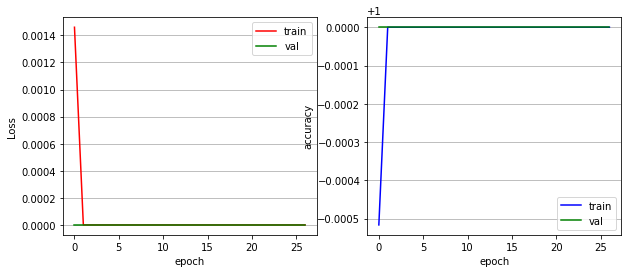

In [26]:
#plot 
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_no_dropout")


# A2 : CNN with two layers + data augmentation

In [12]:
model =models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10))

In [13]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [16]:
# history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=15)
history = model.fit_generator(train_generator_with_data_augmentation, steps_per_epoch=nb_train_samples/32, 
                    epochs=20, validation_data=validation_generator,
                    validation_steps=nb_val_samples/32)

Epoch 1/20
1875/1875 [==============================] - 115s 61ms/step - loss: 2.1855e-11 - accuracy: 1.0000 - val_loss: 7.9473e-12 - val_accuracy: 1.0000
Epoch 2/20
1875/1875 [==============================] - 117s 63ms/step - loss: 9.9341e-12 - accuracy: 1.0000 - val_loss: 1.9868e-12 - val_accuracy: 1.0000
Epoch 3/20
1875/1875 [==============================] - 117s 62ms/step - loss: 1.1921e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
1875/1875 [==============================] - 165s 88ms/step

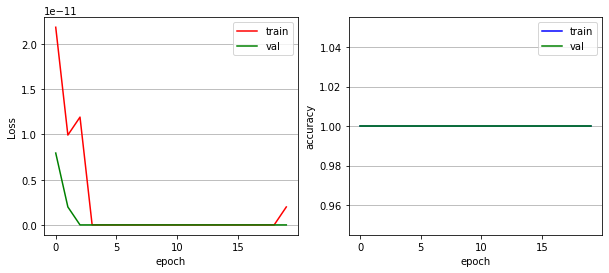

In [17]:
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_data_augmentation")

# B1 : CNN with maxpooling layers

In [18]:
# Add Maxpooling and Dropout Layers
model2 =models.Sequential()
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model2.add(tf.keras.layers.MaxPooling2D(2,2))
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dropout(0.4))
model2.add(tf.keras.layers.Dense(64, activation="relu"))
model2.add(tf.keras.layers.Dense(10))

In [19]:
model2.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [20]:
history = model2.fit_generator(train_generator, steps_per_epoch=nb_train_samples/32, 
                    epochs=10, validation_data=validation_generator,
                    validation_steps=nb_val_samples/32)

Epoch 1/10
1875/1875 [==============================] - 85s 45ms/step - loss: 9.6060e-04 - accuracy: 0.9998 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss

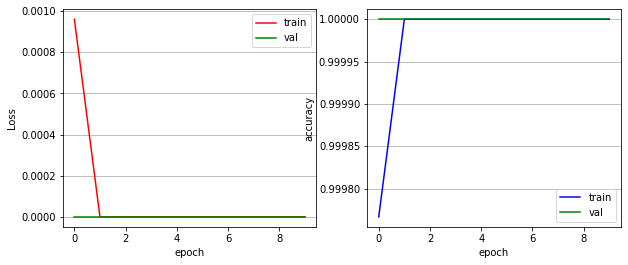

In [21]:
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_with0_dropout_maxpool")

# B2 : CNN with maxpooling + data augmentation

In [22]:
model2 =models.Sequential()
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model2.add(tf.keras.layers.MaxPooling2D(2,2))
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dropout(0.4))
model2.add(tf.keras.layers.Dense(64, activation="relu"))
model2.add(tf.keras.layers.Dense(10))

In [23]:
model2.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [24]:
#history = model2.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=15)
history = model2.fit_generator(train_generator_with_data_augmentation, steps_per_epoch=nb_train_samples/32, 
                    epochs=27, validation_data=validation_generator,
                    validation_steps=nb_val_samples/32)

Epoch 1/27
1875/1875 [==============================] - 82s 43ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/27
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000TA: 55s - loss: 0.0000e+00 - accurac - ETA: 54s - loss: 0.0000e+00 - accura - ETA: 54s - loss: 0.0000e - ETA: 52s - loss:  - ETA: 50s - loss: 0.00 - ETA: 49s - loss: 0.0000e+00 - accu - ETA: 48s - loss: 0.0000e+00 - accuracy: 1.00 - ETA: 48s - los - ETA: 46s - loss - ETA: 43s - loss: 0.0000e+00 - accuracy: 1.0 - ETA: 43s - loss: 0.0000e+00 - accuracy:  - ETA: 43s - loss: 0.0000e+00 - ETA: 42s - loss: 0.0000e+00 - accur - ETA: 41s - loss: 0.0000e+00 - accuracy: - ETA: 37s - loss: 0.0000e+00 - accurac - ETA: 36s - loss: 0.0000e+00 - accuracy: 1 - - ETA: 14s - loss: 0.0000e+00 - accuracy: 1.000 - ETA: 14s - loss: 0.0000e+00 - ac - ETA: 13s - loss: 0.0000e+00 - accuracy - ETA: 12s - loss: - E

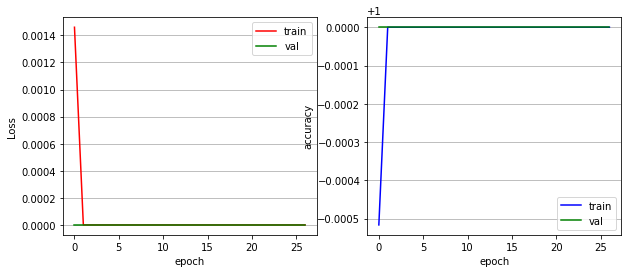

In [25]:
#plot 
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_with0_maxpool_dropout_augmentation")

In [27]:
exp_name = "histogram_weights_analysis"

In [32]:
tboard = callbacks.TensorBoard(
    log_dir = "logs/{}".format(exp_name),
    histogram_freq=1,
    write_images=True)

In [33]:
callbacks = [
    tboard
]

In [34]:
model3 =models.Sequential()
model3.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model3.add(tf.keras.layers.MaxPooling2D(2,2))
model3.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dropout(0.4))
model3.add(tf.keras.layers.Dense(64, activation="relu"))
model3.add(tf.keras.layers.Dense(10))

In [35]:
model3.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [36]:
history3 = model3.fit_generator(train_generator_with_data_augmentation, steps_per_epoch=nb_train_samples/32, 
                    epochs=5, validation_data=validation_generator,
                    validation_steps=nb_val_samples/32, callbacks=callbacks)

Epoch 1/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 1.000 - ETA: 50s - loss: 0.0000e+00 - accurac - ETA: 44s - loss: 0. - ETA: 43s - loss: 0.0000e+ - ETA: 41s - loss: 0.0000e+00 - accuracy: - ETA: 41s - loss: 0.0000e+00 - accuracy:  - ETA: 4 - ETA: 36s - loss: 0.0000e+00 - - ETA: 35s - loss: 0.0000e+00  - ETA: 34s - loss - ETA: 32s - lo - ETA: 30s - loss: 0.0000e+00 - ac - ETA: 29s - loss: 0.0000e+00 - accuracy: 1.000 - ETA: 29s - loss: 0.0000e+00  - ETA: 28s - loss: 0.0000e+00 - accura - ETA: 27s - loss: 0.0000e+00 - accuracy:  - ETA: 27s - loss: 0.0000e+00 - a - ETA: 26s - loss: 0.0000e+0 - ETA: 25s - - ETA: 23s - loss: 0.0000e+00 - accuracy: 1.00 - ETA: 23 - ETA: 20s - loss: 0.0000e+00 - accuracy: 1.00 - ETA: 20s - loss: 0.0000e+00 - acc

In [38]:
%load_ext tensorboard
%tensorboard --logdir logs/fit